introduction to svm

soft margin and hard margin

svm math intuition 

cost function

sv regression

svm kernels

svm classifiers

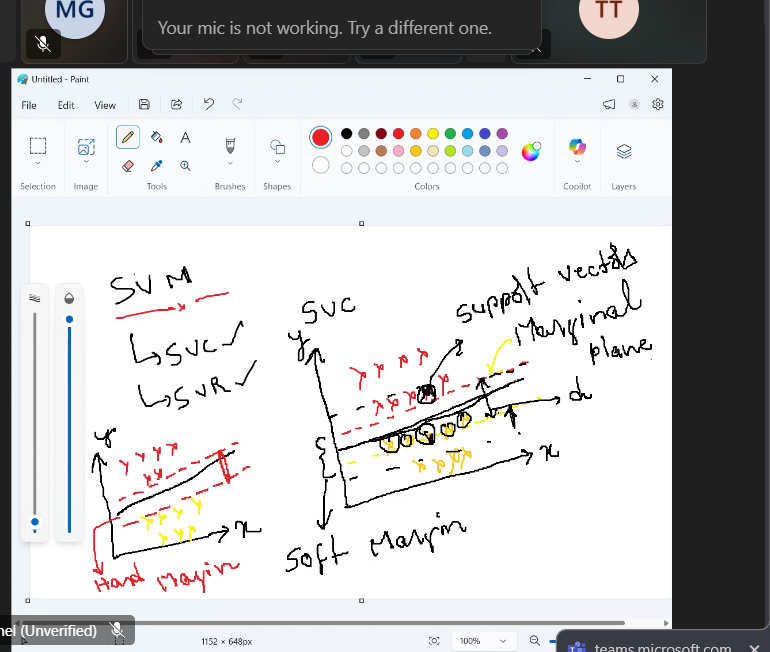

by using svm---> draw marginal planes

if datapoints are there in blw the margin ---->softmargin

otherwise--->hard margin


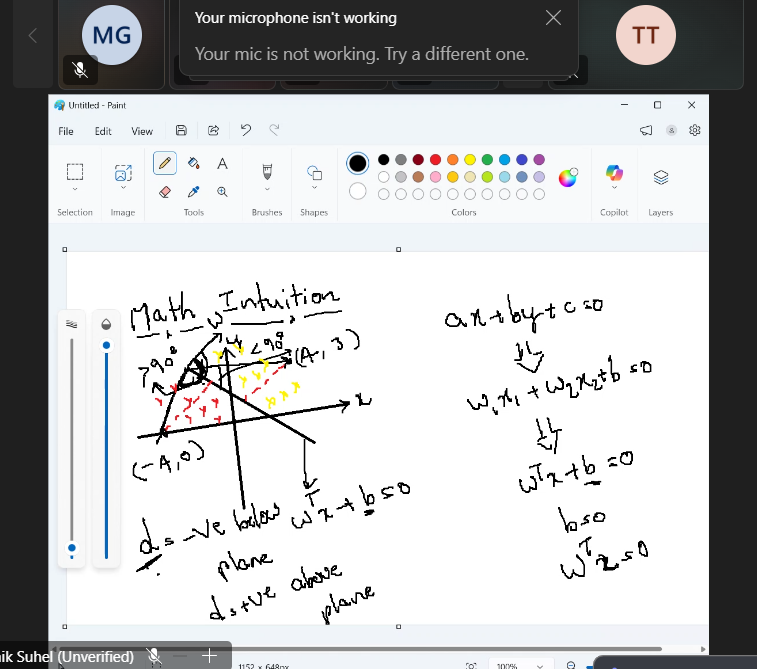

if the angle is > 90degrees---->negative plane

otherwise-----> positive plane

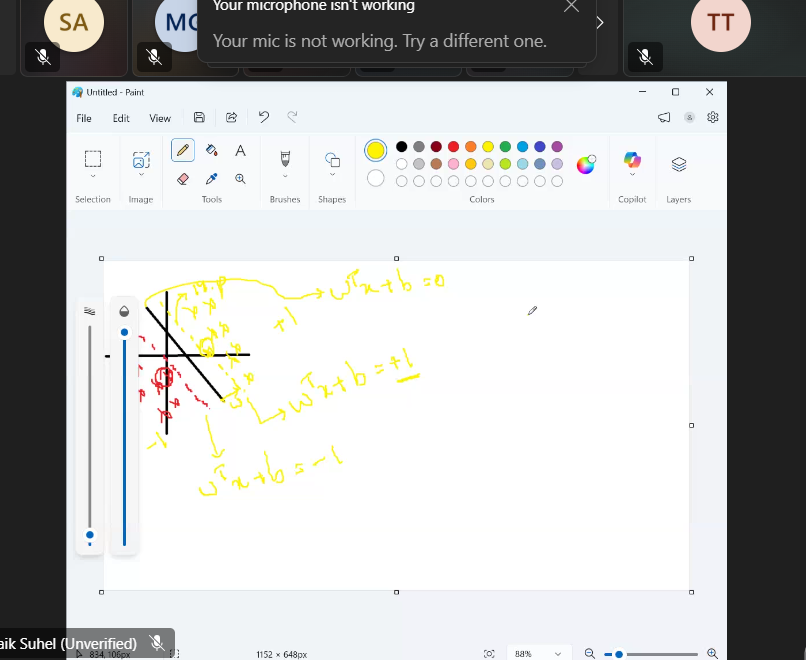

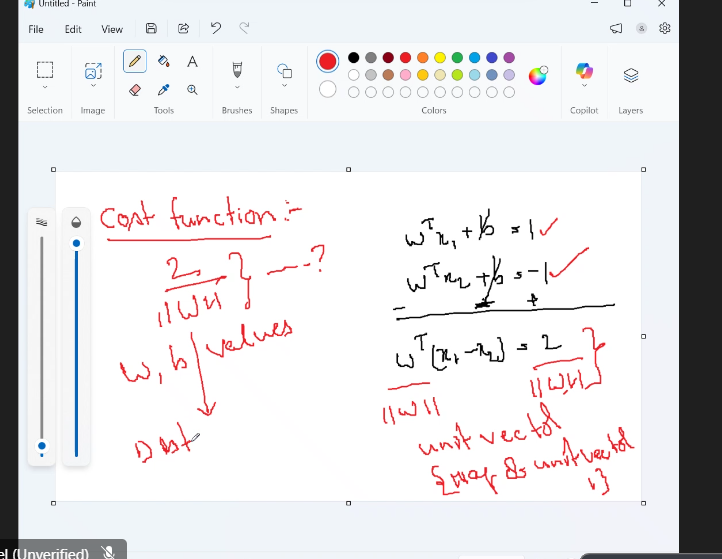

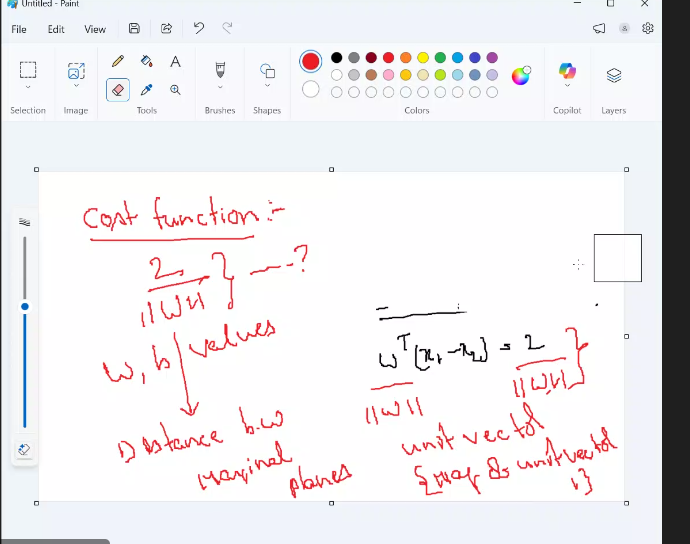

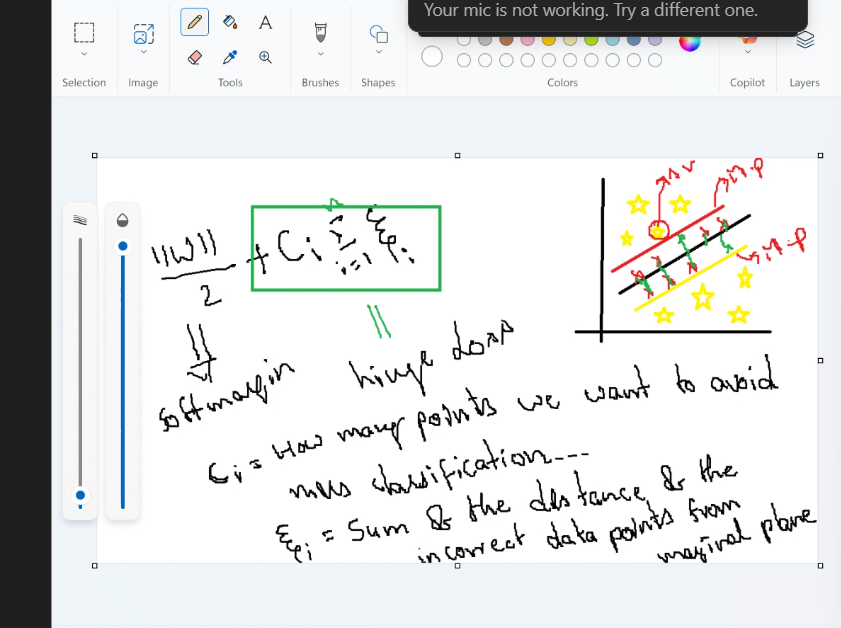

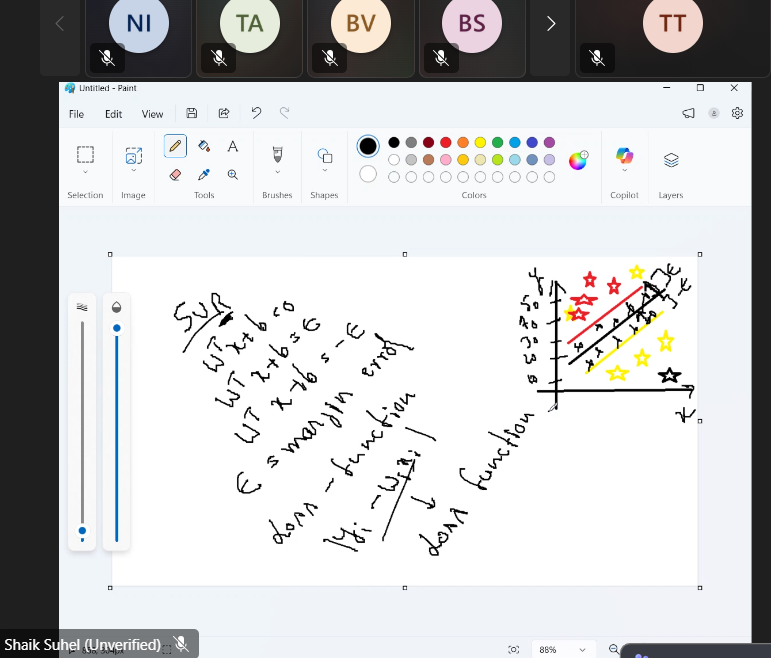      ![{A68E0043-BBC5-4B02-A789-FC7402ABE509}.png](attachment:{A68E0043-BBC5-4B02-A789-FC7402ABE509}.png)

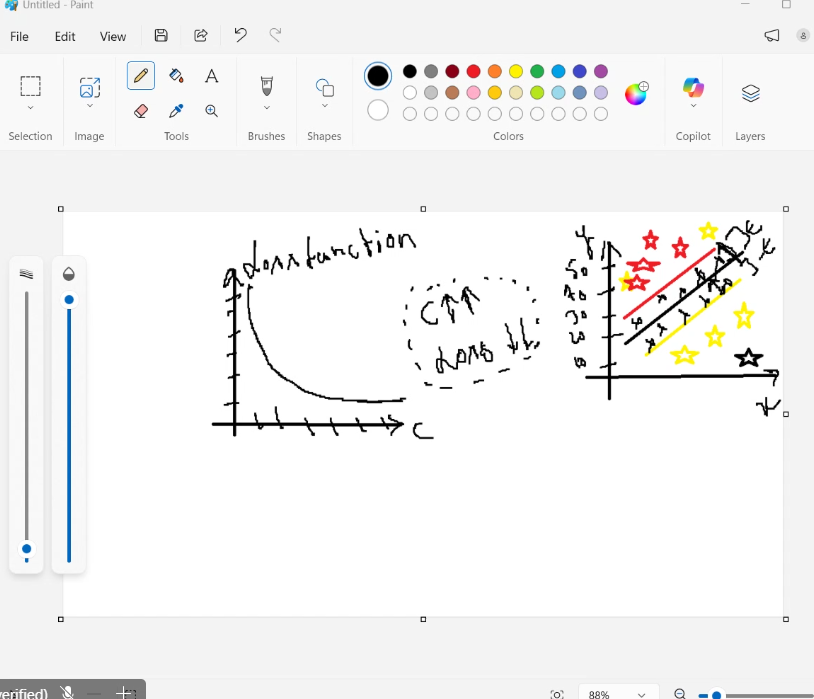

2D to 3D transformtaions can be done using kernels(svm) with math functions

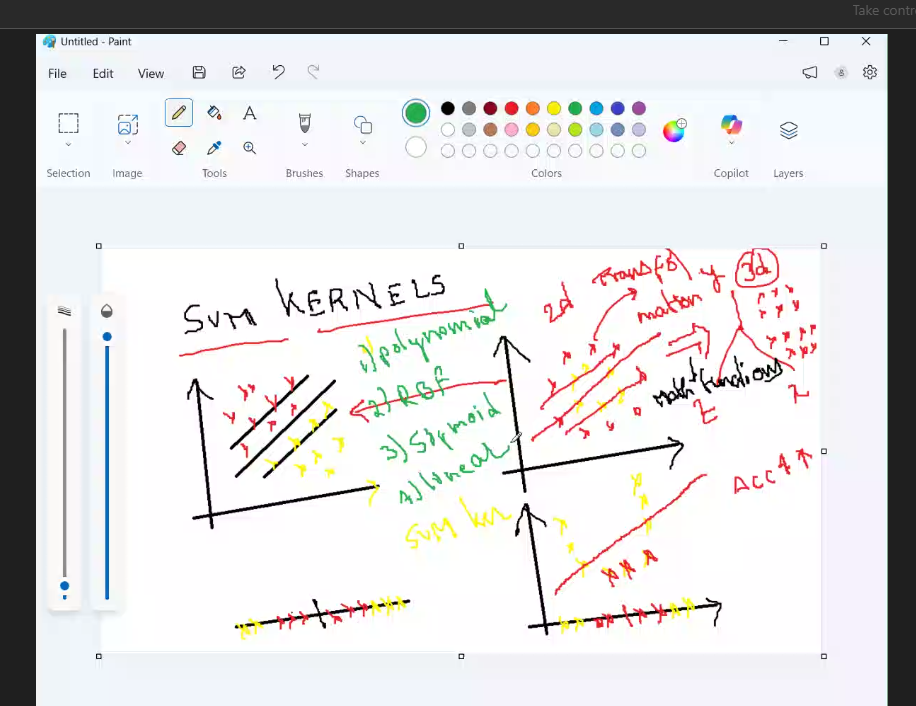

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#lets create synthetic data points
from sklearn.datasets import make_classification

x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)
x



array([[ 1.89375864,  1.17894754],
       [ 0.99865031, -1.59401177],
       [-0.14397113, -0.78579714],
       ...,
       [ 0.88082682, -0.18031185],
       [ 3.76817269,  0.22991609],
       [-1.0287026 , -0.88788975]], shape=(1000, 2))

In [6]:
y

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [7]:
pd.DataFrame(x)[0]

0      1.893759
1      0.998650
2     -0.143971
3      0.089465
4     -1.275219
         ...   
995   -0.651935
996   -0.770241
997    0.880827
998    3.768173
999   -1.028703
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

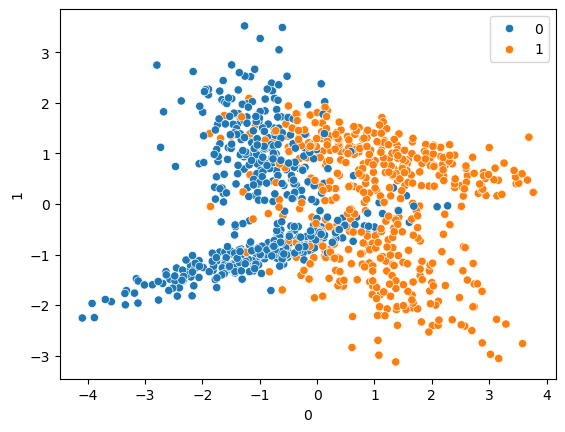

In [8]:
sns.scatterplot(x=pd.DataFrame(x)[0],
                y=pd.DataFrame(x)[1],
                hue=y)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
svc.coef_
y_pred=svc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      0.90      0.88       129
           1       0.89      0.83      0.86       121

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250

[[116  13]
 [ 20 101]]


In [16]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred1=rbf.predict(X_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       129
           1       0.92      0.82      0.86       121

    accuracy                           0.88       250
   macro avg       0.88      0.87      0.88       250
weighted avg       0.88      0.88      0.88       250

[[120   9]
 [ 22  99]]


In [17]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)
y_pred2=polynomial.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       129
           1       0.90      0.76      0.83       121

    accuracy                           0.84       250
   macro avg       0.85      0.84      0.84       250
weighted avg       0.85      0.84      0.84       250

[[119  10]
 [ 29  92]]


In [19]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred3=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       129
           1       0.69      0.71      0.70       121

    accuracy                           0.71       250
   macro avg       0.71      0.71      0.71       250
weighted avg       0.71      0.71      0.71       250

[[91 38]
 [35 86]]


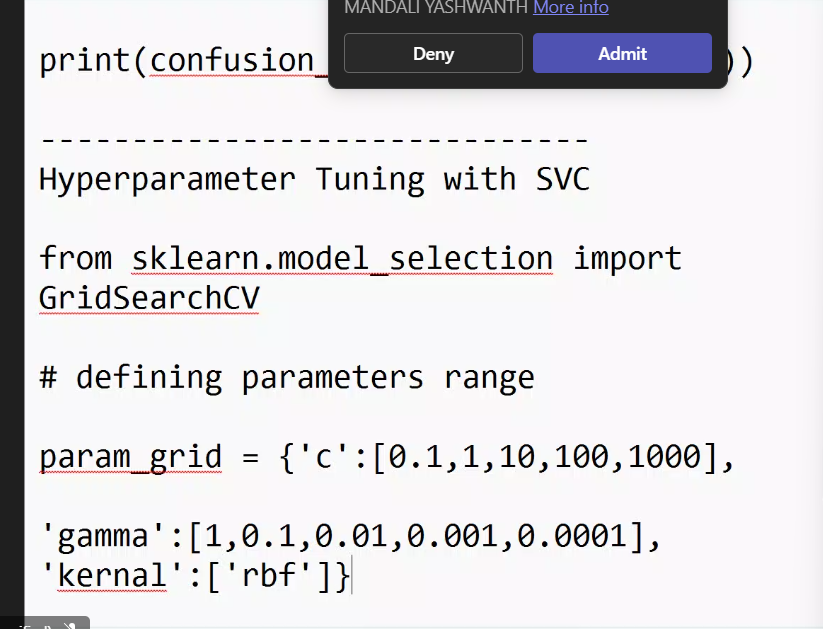

In [ ]:
from sklearn.model_selection import GridSearchCV
#defining parameters range
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.907 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [23]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [24]:
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))


              precision    recall  f1-score   support

           0       0.85      0.93      0.89       129
           1       0.92      0.83      0.87       121

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[120   9]
 [ 21 100]]


c=Regularization parameter

gamma=Influenceof a single data point

Total Combination:

5(c) *  5(gamma) * 1(kernel)=25 models

Here we used GridsearchCV is used to perform hyperparameter tuning

It check all combination of given parameters using cv and selects the model with best performance....

